In [401]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cuda is available.


### Loading CSV Files
The following code block is reading in 2 CSV files of data, both contain data from deployments on different days of distributed air sensors. They contain data for 12 seperate nodes.

In [402]:
# UPLOADING CSV ON COLAB
#from google.colab import files
#data_to_load = input()
# import io
# AF_Data1 = pd.read_csv(io.BytesIO(data_to_load['2021_06_29_AirQ_headers.csv']))
# AF_Data2 = pd.read_csv(io.BytesIO(data_to_load['2021_07_01_AirQ_headers.csv']))

#UPLOADING FILES LOCALLY
AF_Data1 = pd.read_csv("AF_Data/2021_06_29_AirQ_headers.csv")
AF_Data2 = pd.read_csv("AF_Data/2021_07_01_AirQ_headers.csv")

### Function for plotting DF data

In [403]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title, field):
    data = []
    
    value = go.Scatter(
        x=df.index,
        y=df[field],
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    

In [404]:
# Replace epoch time with DateTime in DF
AF_Data1['Teensy Server Time'] = AF_Data1['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

# Move time stamp of second dataset 9 days in the future to avoid overlap
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: x + datetime.timedelta(days=8))

# Seperate measurements of seperate node data into their own day
num_nodes = 12
for i in range(2,num_nodes+1):
    AF_Data1.loc[AF_Data1['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)
    AF_Data2.loc[AF_Data2['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)

frames = [AF_Data1, AF_Data2]
AF_Data = pd.concat(frames)

# Set the index to the time of sample
AF_Data = AF_Data.set_index(['Teensy Server Time'])
#AF_Data.index = pd.to_datetime(AF_Data.index)
if not AF_Data.index.is_monotonic:
    AF_Data = AF_Data.sort_index()


### Removing outliers from data
Due to cost constraint on the distributed nodes it is known that certain sensors can have somewhat inconsistent measurements or NaN measurements. I am handling this by finding outlier data points and replacing them with the average measurement

In [405]:
rate = 7
# TEMP DATA
mean_temp = AF_Data['Temp'].mean()
std = AF_Data['Temp'].std()
outliers = (AF_Data['Temp'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Temp'] = np.nan
AF_Data['Temp'].fillna(mean_temp, inplace=True)

# HUMIDITY DATA
mean_temp = AF_Data['Humidity'].mean()
std = AF_Data['Humidity'].std()
outliers = (AF_Data['Humidity'] - mean_temp).abs() > std
AF_Data.loc[outliers, 'Humidity'] = np.nan
AF_Data['Humidity'].fillna(mean_temp, inplace=True)

# SOUND DATA
mean_temp = AF_Data['Sound'].mean()
std = AF_Data['Sound'].std()
outliers = (AF_Data['Sound'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Sound'] = np.nan
AF_Data['Sound'].fillna(mean_temp, inplace=True)

# C02 DATA
mean_temp = AF_Data['CO2'].mean()
std = AF_Data['CO2'].std()
outliers = (AF_Data['CO2'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'CO2'] = np.nan
AF_Data['CO2'].fillna(mean_temp, inplace=True)

# PM1 DATA
mean_temp = AF_Data['PM1'].mean()
std = AF_Data['PM1'].std()
outliers = (AF_Data['PM1'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM1'] = np.nan
AF_Data['PM1'].fillna(mean_temp, inplace=True)

# PM2.5 DATA
mean_temp = AF_Data['PM2.5'].mean()
std = AF_Data['PM2.5'].std()
outliers = (AF_Data['PM2.5'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM2.5'] = np.nan
AF_Data['PM2.5'].fillna(mean_temp, inplace=True)

# PM10 DATA
mean_temp = AF_Data['PM10'].mean()
std = AF_Data['PM10'].std()
outliers = (AF_Data['PM10'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM10'] = np.nan
AF_Data['PM10'].fillna(mean_temp, inplace=True)

# VOC DATA
mean_temp = AF_Data['VOC'].mean()
std = AF_Data['VOC'].std()
outliers = (AF_Data['VOC'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'VOC'] = np.nan
AF_Data['VOC'].fillna(mean_temp, inplace=True)

### Numpy

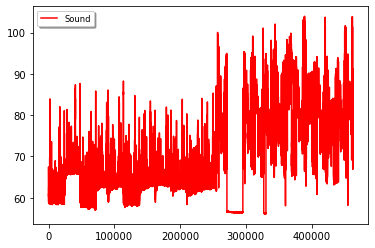

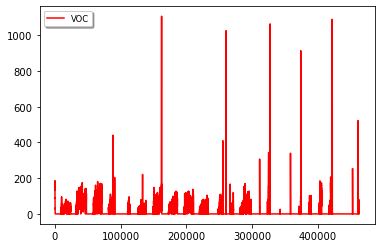

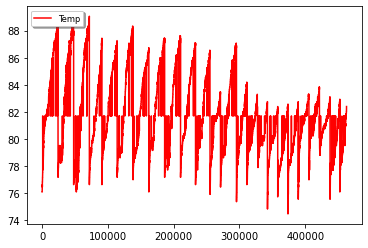

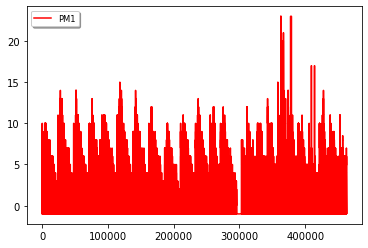

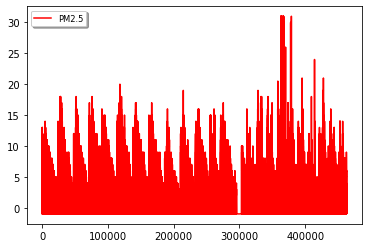

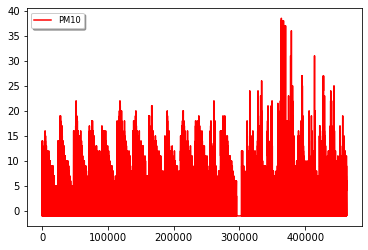

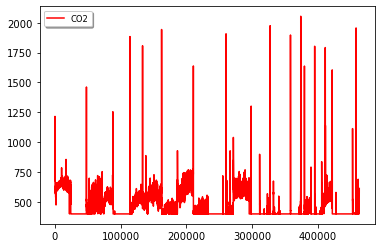

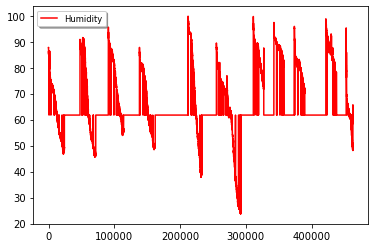

In [406]:
sound = AF_Data['Sound'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(sound,'r',label='Sound')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

voc = AF_Data['VOC'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(voc,'r',label='VOC')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

temp = AF_Data['Temp'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(temp,'r',label='Temp')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm1 = AF_Data['PM1'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm1,'r',label='PM1')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm25 = AF_Data['PM2.5'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm25,'r',label='PM2.5')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm10 = AF_Data['PM10'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm10,'r',label='PM10')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

co2 = AF_Data['CO2'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(co2,'r',label='CO2')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

hum = AF_Data['Humidity'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(hum,'r',label='Humidity')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### Plots of data available

In [407]:
#plot_dataset(AF_Data_date, title='Temp vs Time', field="Temp")